## Train modified MLP with Dropout on CIFAR-10

We train a multi-layer perceptron (MLP) with two hidden layers and a softmax loss, using ReLU non-linearities, on the CIFAR-10 dataset. 


### Settings

In [1]:
import os
import torch
import torchvision
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import json
from vis_utils import *
from model_def import *
from model_train import *
from net_reduce import *
%matplotlib inline


In [2]:
class MLPDropout(nn.Module):
    '''
        Initialise a fully connected multi-layer perceptron (MLP)
        with dropout regularization (0.5)
    '''
    def __init__(self, input_dim=3072, fc1_dim=100, fc2_dim=100, drop_out_factor=0.5):
        super(MLPDropout, self).__init__()
        self.fc1 = nn.Linear(input_dim, fc1_dim)
        self.fc2 = nn.Linear(fc1_dim, fc2_dim)
        self.fc3 = nn.Linear(fc2_dim, 10)
        self.drop_out_factor = drop_out_factor


    def _init_weights(self, init_sigma=0.01):
        '''
            Initialization schemes for layer weights
        '''
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                pass
                # n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                # m.weight.data.normal_(0, math.sqrt(2. / n))
                # if m.bias is not None:
                #     m.bias.data.zero_()
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.weight.data.normal_(0, init_sigma)
                m.bias.data.zero_()
        

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.dropout(x,self.drop_out_factor)
        x = F.relu(self.fc2(x))
        x = F.dropout(x,self.drop_out_factor)
        x = self.fc3(x)
        return x 

### Network training

Trains a CNN on CIFAR-10 and saves it by default under "./data/cifar-lenet-v1_w1-500" as 'net-trained.dat'. If the pre-trained network is available, it should be saved here to be automatically loaded instead of training from scratch.

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/50 [00:00<?, ?it/s]

MLPDropout (
  (fc1): Linear (3072 -> 100)
  (fc2): Linear (100 -> 100)
  (fc3): Linear (100 -> 10)
)
epoch:   0 batch:   100 loss: 2.303 accu: 0.101 lr: 0.030000
epoch:   0 batch:   200 loss: 2.303 accu: 0.101 lr: 0.030000
epoch:   0 batch:   300 loss: 2.304 accu: 0.105 lr: 0.030000
epoch:   0 batch:   400 loss: 2.241 accu: 0.140 lr: 0.030000
epoch:   0 batch:   500 loss: 2.063 accu: 0.195 lr: 0.030000


  2%|▏         | 1/50 [00:14<11:42, 14.35s/it]

epoch:   1 batch:   100 loss: 2.001 accu: 0.236 lr: 0.027000
epoch:   1 batch:   200 loss: 1.936 accu: 0.269 lr: 0.027000
epoch:   1 batch:   300 loss: 1.890 accu: 0.309 lr: 0.027000
epoch:   1 batch:   400 loss: 1.831 accu: 0.337 lr: 0.027000
epoch:   1 batch:   500 loss: 1.775 accu: 0.365 lr: 0.027000


  4%|▍         | 2/50 [00:27<11:18, 14.14s/it]

epoch:   2 batch:   100 loss: 1.735 accu: 0.385 lr: 0.024300
epoch:   2 batch:   200 loss: 1.725 accu: 0.390 lr: 0.024300
epoch:   2 batch:   300 loss: 1.679 accu: 0.407 lr: 0.024300
epoch:   2 batch:   400 loss: 1.674 accu: 0.412 lr: 0.024300
epoch:   2 batch:   500 loss: 1.665 accu: 0.416 lr: 0.024300


  6%|▌         | 3/50 [00:42<11:14, 14.34s/it]

epoch:   3 batch:   100 loss: 1.621 accu: 0.442 lr: 0.021870
epoch:   3 batch:   200 loss: 1.633 accu: 0.433 lr: 0.021870
epoch:   3 batch:   300 loss: 1.621 accu: 0.433 lr: 0.021870
epoch:   3 batch:   400 loss: 1.631 accu: 0.430 lr: 0.021870
epoch:   3 batch:   500 loss: 1.630 accu: 0.432 lr: 0.021870


  8%|▊         | 4/50 [00:59<11:33, 15.08s/it]

epoch:   4 batch:   100 loss: 1.598 accu: 0.452 lr: 0.019683
epoch:   4 batch:   200 loss: 1.588 accu: 0.448 lr: 0.019683
epoch:   4 batch:   300 loss: 1.619 accu: 0.440 lr: 0.019683
epoch:   4 batch:   400 loss: 1.606 accu: 0.444 lr: 0.019683
epoch:   4 batch:   500 loss: 1.602 accu: 0.450 lr: 0.019683


 10%|█         | 5/50 [01:14<11:18, 15.09s/it]

epoch:   5 batch:   100 loss: 1.566 accu: 0.468 lr: 0.017715
epoch:   5 batch:   200 loss: 1.576 accu: 0.450 lr: 0.017715
epoch:   5 batch:   300 loss: 1.571 accu: 0.458 lr: 0.017715
epoch:   5 batch:   400 loss: 1.593 accu: 0.455 lr: 0.017715
epoch:   5 batch:   500 loss: 1.592 accu: 0.444 lr: 0.017715


 12%|█▏        | 6/50 [01:30<11:14, 15.32s/it]

epoch:   6 batch:   100 loss: 1.557 accu: 0.466 lr: 0.015943
epoch:   6 batch:   200 loss: 1.556 accu: 0.462 lr: 0.015943
epoch:   6 batch:   300 loss: 1.558 accu: 0.457 lr: 0.015943
epoch:   6 batch:   400 loss: 1.564 accu: 0.467 lr: 0.015943
epoch:   6 batch:   500 loss: 1.562 accu: 0.462 lr: 0.015943


 14%|█▍        | 7/50 [01:45<10:58, 15.32s/it]

epoch:   7 batch:   100 loss: 1.536 accu: 0.468 lr: 0.014349
epoch:   7 batch:   200 loss: 1.537 accu: 0.469 lr: 0.014349
epoch:   7 batch:   300 loss: 1.551 accu: 0.460 lr: 0.014349
epoch:   7 batch:   400 loss: 1.538 accu: 0.472 lr: 0.014349
epoch:   7 batch:   500 loss: 1.541 accu: 0.469 lr: 0.014349


 16%|█▌        | 8/50 [02:01<10:49, 15.47s/it]

epoch:   8 batch:   100 loss: 1.514 accu: 0.484 lr: 0.012914
epoch:   8 batch:   200 loss: 1.525 accu: 0.480 lr: 0.012914
epoch:   8 batch:   300 loss: 1.532 accu: 0.468 lr: 0.012914
epoch:   8 batch:   400 loss: 1.530 accu: 0.473 lr: 0.012914
epoch:   8 batch:   500 loss: 1.532 accu: 0.469 lr: 0.012914


 18%|█▊        | 9/50 [02:15<10:15, 15.02s/it]

epoch:   9 batch:   100 loss: 1.490 accu: 0.486 lr: 0.011623
epoch:   9 batch:   200 loss: 1.517 accu: 0.482 lr: 0.011623
epoch:   9 batch:   300 loss: 1.494 accu: 0.486 lr: 0.011623
epoch:   9 batch:   400 loss: 1.526 accu: 0.476 lr: 0.011623
epoch:   9 batch:   500 loss: 1.545 accu: 0.466 lr: 0.011623


 20%|██        | 10/50 [02:30<09:55, 14.88s/it]

epoch:  10 batch:   100 loss: 1.491 accu: 0.493 lr: 0.010460
epoch:  10 batch:   200 loss: 1.494 accu: 0.487 lr: 0.010460
epoch:  10 batch:   300 loss: 1.507 accu: 0.486 lr: 0.010460
epoch:  10 batch:   400 loss: 1.496 accu: 0.484 lr: 0.010460
epoch:  10 batch:   500 loss: 1.511 accu: 0.472 lr: 0.010460


 22%|██▏       | 11/50 [02:43<09:20, 14.37s/it]

epoch:  11 batch:   100 loss: 1.478 accu: 0.499 lr: 0.009414
epoch:  11 batch:   200 loss: 1.477 accu: 0.493 lr: 0.009414
epoch:  11 batch:   300 loss: 1.495 accu: 0.485 lr: 0.009414
epoch:  11 batch:   400 loss: 1.486 accu: 0.485 lr: 0.009414
epoch:  11 batch:   500 loss: 1.495 accu: 0.482 lr: 0.009414


 24%|██▍       | 12/50 [02:57<08:57, 14.15s/it]

epoch:  12 batch:   100 loss: 1.462 accu: 0.501 lr: 0.008473
epoch:  12 batch:   200 loss: 1.474 accu: 0.494 lr: 0.008473
epoch:  12 batch:   300 loss: 1.477 accu: 0.493 lr: 0.008473
epoch:  12 batch:   400 loss: 1.484 accu: 0.485 lr: 0.008473
epoch:  12 batch:   500 loss: 1.481 accu: 0.490 lr: 0.008473


 26%|██▌       | 13/50 [03:13<09:05, 14.75s/it]

epoch:  13 batch:   100 loss: 1.444 accu: 0.499 lr: 0.007626
epoch:  13 batch:   200 loss: 1.476 accu: 0.491 lr: 0.007626
epoch:  13 batch:   300 loss: 1.471 accu: 0.489 lr: 0.007626
epoch:  13 batch:   400 loss: 1.474 accu: 0.497 lr: 0.007626
epoch:  13 batch:   500 loss: 1.463 accu: 0.500 lr: 0.007626


 28%|██▊       | 14/50 [03:27<08:50, 14.72s/it]

epoch:  14 batch:   100 loss: 1.447 accu: 0.503 lr: 0.006863
epoch:  14 batch:   200 loss: 1.440 accu: 0.499 lr: 0.006863
epoch:  14 batch:   300 loss: 1.453 accu: 0.504 lr: 0.006863
epoch:  14 batch:   400 loss: 1.451 accu: 0.502 lr: 0.006863
epoch:  14 batch:   500 loss: 1.467 accu: 0.489 lr: 0.006863


 30%|███       | 15/50 [03:42<08:34, 14.71s/it]

epoch:  15 batch:   100 loss: 1.416 accu: 0.513 lr: 0.006177
epoch:  15 batch:   200 loss: 1.452 accu: 0.496 lr: 0.006177
epoch:  15 batch:   300 loss: 1.451 accu: 0.504 lr: 0.006177
epoch:  15 batch:   400 loss: 1.438 accu: 0.506 lr: 0.006177
epoch:  15 batch:   500 loss: 1.464 accu: 0.501 lr: 0.006177


 32%|███▏      | 16/50 [03:56<08:14, 14.55s/it]

epoch:  16 batch:   100 loss: 1.438 accu: 0.505 lr: 0.005559
epoch:  16 batch:   200 loss: 1.426 accu: 0.508 lr: 0.005559
epoch:  16 batch:   300 loss: 1.431 accu: 0.507 lr: 0.005559
epoch:  16 batch:   400 loss: 1.438 accu: 0.509 lr: 0.005559
epoch:  16 batch:   500 loss: 1.452 accu: 0.506 lr: 0.005559


 34%|███▍      | 17/50 [04:09<07:44, 14.08s/it]

epoch:  17 batch:   100 loss: 1.442 accu: 0.510 lr: 0.005003
epoch:  17 batch:   200 loss: 1.409 accu: 0.517 lr: 0.005003
epoch:  17 batch:   300 loss: 1.420 accu: 0.514 lr: 0.005003
epoch:  17 batch:   400 loss: 1.442 accu: 0.506 lr: 0.005003
epoch:  17 batch:   500 loss: 1.421 accu: 0.510 lr: 0.005003


 36%|███▌      | 18/50 [04:23<07:28, 14.01s/it]

epoch:  18 batch:   100 loss: 1.394 accu: 0.520 lr: 0.004503
epoch:  18 batch:   200 loss: 1.399 accu: 0.524 lr: 0.004503
epoch:  18 batch:   300 loss: 1.427 accu: 0.507 lr: 0.004503
epoch:  18 batch:   400 loss: 1.426 accu: 0.510 lr: 0.004503
epoch:  18 batch:   500 loss: 1.432 accu: 0.506 lr: 0.004503


 38%|███▊      | 19/50 [04:37<07:17, 14.12s/it]

epoch:  19 batch:   100 loss: 1.408 accu: 0.515 lr: 0.004053
epoch:  19 batch:   200 loss: 1.411 accu: 0.515 lr: 0.004053
epoch:  19 batch:   300 loss: 1.403 accu: 0.522 lr: 0.004053
epoch:  19 batch:   400 loss: 1.413 accu: 0.510 lr: 0.004053
epoch:  19 batch:   500 loss: 1.407 accu: 0.515 lr: 0.004053


 40%|████      | 20/50 [04:53<07:14, 14.48s/it]

epoch:  20 batch:   100 loss: 1.381 accu: 0.529 lr: 0.003647
epoch:  20 batch:   200 loss: 1.391 accu: 0.521 lr: 0.003647
epoch:  20 batch:   300 loss: 1.409 accu: 0.517 lr: 0.003647
epoch:  20 batch:   400 loss: 1.415 accu: 0.518 lr: 0.003647
epoch:  20 batch:   500 loss: 1.409 accu: 0.519 lr: 0.003647


 42%|████▏     | 21/50 [05:07<07:00, 14.51s/it]

epoch:  21 batch:   100 loss: 1.395 accu: 0.520 lr: 0.003283
epoch:  21 batch:   200 loss: 1.395 accu: 0.527 lr: 0.003283
epoch:  21 batch:   300 loss: 1.403 accu: 0.514 lr: 0.003283
epoch:  21 batch:   400 loss: 1.391 accu: 0.524 lr: 0.003283
epoch:  21 batch:   500 loss: 1.392 accu: 0.523 lr: 0.003283


 44%|████▍     | 22/50 [05:22<06:45, 14.47s/it]

epoch:  22 batch:   100 loss: 1.377 accu: 0.522 lr: 0.002954
epoch:  22 batch:   200 loss: 1.374 accu: 0.521 lr: 0.002954
epoch:  22 batch:   300 loss: 1.386 accu: 0.527 lr: 0.002954
epoch:  22 batch:   400 loss: 1.404 accu: 0.519 lr: 0.002954
epoch:  22 batch:   500 loss: 1.391 accu: 0.522 lr: 0.002954


 46%|████▌     | 23/50 [05:36<06:27, 14.34s/it]

epoch:  23 batch:   100 loss: 1.362 accu: 0.533 lr: 0.002659
epoch:  23 batch:   200 loss: 1.380 accu: 0.524 lr: 0.002659
epoch:  23 batch:   300 loss: 1.377 accu: 0.530 lr: 0.002659
epoch:  23 batch:   400 loss: 1.382 accu: 0.522 lr: 0.002659
epoch:  23 batch:   500 loss: 1.398 accu: 0.516 lr: 0.002659


 48%|████▊     | 24/50 [05:50<06:08, 14.18s/it]

epoch:  24 batch:   100 loss: 1.368 accu: 0.534 lr: 0.002393
epoch:  24 batch:   200 loss: 1.374 accu: 0.522 lr: 0.002393
epoch:  24 batch:   300 loss: 1.373 accu: 0.528 lr: 0.002393
epoch:  24 batch:   400 loss: 1.386 accu: 0.527 lr: 0.002393
epoch:  24 batch:   500 loss: 1.380 accu: 0.523 lr: 0.002393


 50%|█████     | 25/50 [06:03<05:46, 13.86s/it]

epoch:  25 batch:   100 loss: 1.370 accu: 0.530 lr: 0.002154
epoch:  25 batch:   200 loss: 1.376 accu: 0.524 lr: 0.002154
epoch:  25 batch:   300 loss: 1.371 accu: 0.531 lr: 0.002154
epoch:  25 batch:   400 loss: 1.374 accu: 0.529 lr: 0.002154
epoch:  25 batch:   500 loss: 1.362 accu: 0.530 lr: 0.002154


 52%|█████▏    | 26/50 [06:17<05:37, 14.06s/it]

epoch:  26 batch:   100 loss: 1.369 accu: 0.531 lr: 0.001938
epoch:  26 batch:   200 loss: 1.371 accu: 0.533 lr: 0.001938
epoch:  26 batch:   300 loss: 1.365 accu: 0.528 lr: 0.001938
epoch:  26 batch:   400 loss: 1.352 accu: 0.532 lr: 0.001938
epoch:  26 batch:   500 loss: 1.365 accu: 0.538 lr: 0.001938


 54%|█████▍    | 27/50 [06:32<05:25, 14.14s/it]

epoch:  27 batch:   100 loss: 1.352 accu: 0.541 lr: 0.001744
epoch:  27 batch:   200 loss: 1.364 accu: 0.533 lr: 0.001744
epoch:  27 batch:   300 loss: 1.356 accu: 0.532 lr: 0.001744
epoch:  27 batch:   400 loss: 1.356 accu: 0.530 lr: 0.001744
epoch:  27 batch:   500 loss: 1.370 accu: 0.529 lr: 0.001744


 56%|█████▌    | 28/50 [06:46<05:12, 14.23s/it]

epoch:  28 batch:   100 loss: 1.348 accu: 0.531 lr: 0.001570
epoch:  28 batch:   200 loss: 1.350 accu: 0.540 lr: 0.001570
epoch:  28 batch:   300 loss: 1.353 accu: 0.536 lr: 0.001570
epoch:  28 batch:   400 loss: 1.361 accu: 0.538 lr: 0.001570
epoch:  28 batch:   500 loss: 1.363 accu: 0.528 lr: 0.001570


 58%|█████▊    | 29/50 [07:01<05:06, 14.59s/it]

epoch:  29 batch:   100 loss: 1.352 accu: 0.536 lr: 0.001413
epoch:  29 batch:   200 loss: 1.348 accu: 0.538 lr: 0.001413
epoch:  29 batch:   300 loss: 1.352 accu: 0.535 lr: 0.001413
epoch:  29 batch:   400 loss: 1.343 accu: 0.537 lr: 0.001413
epoch:  29 batch:   500 loss: 1.357 accu: 0.531 lr: 0.001413


 60%|██████    | 30/50 [07:15<04:47, 14.38s/it]

epoch:  30 batch:   100 loss: 1.351 accu: 0.538 lr: 0.001272
epoch:  30 batch:   200 loss: 1.350 accu: 0.533 lr: 0.001272
epoch:  30 batch:   300 loss: 1.348 accu: 0.535 lr: 0.001272
epoch:  30 batch:   400 loss: 1.341 accu: 0.544 lr: 0.001272
epoch:  30 batch:   500 loss: 1.347 accu: 0.531 lr: 0.001272


 62%|██████▏   | 31/50 [07:29<04:28, 14.16s/it]

epoch:  31 batch:   100 loss: 1.338 accu: 0.541 lr: 0.001145
epoch:  31 batch:   200 loss: 1.341 accu: 0.541 lr: 0.001145
epoch:  31 batch:   300 loss: 1.347 accu: 0.534 lr: 0.001145
epoch:  31 batch:   400 loss: 1.345 accu: 0.540 lr: 0.001145
epoch:  31 batch:   500 loss: 1.350 accu: 0.539 lr: 0.001145


 64%|██████▍   | 32/50 [07:44<04:18, 14.34s/it]

epoch:  32 batch:   100 loss: 1.340 accu: 0.538 lr: 0.001030
epoch:  32 batch:   200 loss: 1.339 accu: 0.540 lr: 0.001030
epoch:  32 batch:   300 loss: 1.344 accu: 0.543 lr: 0.001030
epoch:  32 batch:   400 loss: 1.342 accu: 0.537 lr: 0.001030
epoch:  32 batch:   500 loss: 1.340 accu: 0.542 lr: 0.001030


 66%|██████▌   | 33/50 [07:58<04:03, 14.34s/it]

epoch:  33 batch:   100 loss: 1.333 accu: 0.539 lr: 0.000927
epoch:  33 batch:   200 loss: 1.343 accu: 0.538 lr: 0.000927
epoch:  33 batch:   300 loss: 1.325 accu: 0.549 lr: 0.000927
epoch:  33 batch:   400 loss: 1.340 accu: 0.542 lr: 0.000927
epoch:  33 batch:   500 loss: 1.346 accu: 0.539 lr: 0.000927


 68%|██████▊   | 34/50 [08:13<03:50, 14.38s/it]

epoch:  34 batch:   100 loss: 1.331 accu: 0.546 lr: 0.000834
epoch:  34 batch:   200 loss: 1.334 accu: 0.543 lr: 0.000834
epoch:  34 batch:   300 loss: 1.336 accu: 0.547 lr: 0.000834
epoch:  34 batch:   400 loss: 1.334 accu: 0.541 lr: 0.000834
epoch:  34 batch:   500 loss: 1.338 accu: 0.533 lr: 0.000834


 70%|███████   | 35/50 [08:27<03:34, 14.28s/it]

epoch:  35 batch:   100 loss: 1.332 accu: 0.545 lr: 0.000751
epoch:  35 batch:   200 loss: 1.327 accu: 0.544 lr: 0.000751
epoch:  35 batch:   300 loss: 1.334 accu: 0.542 lr: 0.000751
epoch:  35 batch:   400 loss: 1.337 accu: 0.545 lr: 0.000751
epoch:  35 batch:   500 loss: 1.333 accu: 0.538 lr: 0.000751


 72%|███████▏  | 36/50 [08:41<03:19, 14.26s/it]

epoch:  36 batch:   100 loss: 1.315 accu: 0.548 lr: 0.000676
epoch:  36 batch:   200 loss: 1.335 accu: 0.543 lr: 0.000676
epoch:  36 batch:   300 loss: 1.333 accu: 0.538 lr: 0.000676
epoch:  36 batch:   400 loss: 1.333 accu: 0.548 lr: 0.000676
epoch:  36 batch:   500 loss: 1.335 accu: 0.544 lr: 0.000676


 74%|███████▍  | 37/50 [08:56<03:08, 14.52s/it]

epoch:  37 batch:   100 loss: 1.332 accu: 0.542 lr: 0.000608
epoch:  37 batch:   200 loss: 1.339 accu: 0.544 lr: 0.000608
epoch:  37 batch:   300 loss: 1.323 accu: 0.542 lr: 0.000608
epoch:  37 batch:   400 loss: 1.328 accu: 0.542 lr: 0.000608
epoch:  37 batch:   500 loss: 1.319 accu: 0.550 lr: 0.000608


 76%|███████▌  | 38/50 [09:10<02:54, 14.52s/it]

epoch:  38 batch:   100 loss: 1.322 accu: 0.542 lr: 0.000547
epoch:  38 batch:   200 loss: 1.329 accu: 0.547 lr: 0.000547
epoch:  38 batch:   300 loss: 1.318 accu: 0.546 lr: 0.000547
epoch:  38 batch:   400 loss: 1.329 accu: 0.546 lr: 0.000547
epoch:  38 batch:   500 loss: 1.330 accu: 0.541 lr: 0.000547


 78%|███████▊  | 39/50 [09:25<02:40, 14.56s/it]

epoch:  39 batch:   100 loss: 1.314 accu: 0.550 lr: 0.000493
epoch:  39 batch:   200 loss: 1.323 accu: 0.548 lr: 0.000493
epoch:  39 batch:   300 loss: 1.328 accu: 0.546 lr: 0.000493
epoch:  39 batch:   400 loss: 1.325 accu: 0.548 lr: 0.000493
epoch:  39 batch:   500 loss: 1.330 accu: 0.542 lr: 0.000493


 80%|████████  | 40/50 [09:39<02:24, 14.47s/it]

epoch:  40 batch:   100 loss: 1.334 accu: 0.540 lr: 0.000443
epoch:  40 batch:   200 loss: 1.314 accu: 0.553 lr: 0.000443
epoch:  40 batch:   300 loss: 1.308 accu: 0.551 lr: 0.000443
epoch:  40 batch:   400 loss: 1.346 accu: 0.542 lr: 0.000443
epoch:  40 batch:   500 loss: 1.311 accu: 0.544 lr: 0.000443


 82%|████████▏ | 41/50 [09:54<02:10, 14.55s/it]

epoch:  41 batch:   100 loss: 1.315 accu: 0.549 lr: 0.000399
epoch:  41 batch:   200 loss: 1.334 accu: 0.542 lr: 0.000399
epoch:  41 batch:   300 loss: 1.318 accu: 0.546 lr: 0.000399
epoch:  41 batch:   400 loss: 1.311 accu: 0.550 lr: 0.000399
epoch:  41 batch:   500 loss: 1.328 accu: 0.547 lr: 0.000399


 84%|████████▍ | 42/50 [10:08<01:55, 14.44s/it]

epoch:  42 batch:   100 loss: 1.317 accu: 0.555 lr: 0.000359
epoch:  42 batch:   200 loss: 1.315 accu: 0.546 lr: 0.000359
epoch:  42 batch:   300 loss: 1.323 accu: 0.542 lr: 0.000359
epoch:  42 batch:   400 loss: 1.316 accu: 0.550 lr: 0.000359
epoch:  42 batch:   500 loss: 1.328 accu: 0.546 lr: 0.000359


 86%|████████▌ | 43/50 [10:23<01:40, 14.41s/it]

epoch:  43 batch:   100 loss: 1.318 accu: 0.551 lr: 0.000323
epoch:  43 batch:   200 loss: 1.336 accu: 0.540 lr: 0.000323
epoch:  43 batch:   300 loss: 1.319 accu: 0.548 lr: 0.000323
epoch:  43 batch:   400 loss: 1.317 accu: 0.547 lr: 0.000323
epoch:  43 batch:   500 loss: 1.302 accu: 0.558 lr: 0.000323


 88%|████████▊ | 44/50 [10:37<01:26, 14.35s/it]

epoch:  44 batch:   100 loss: 1.317 accu: 0.546 lr: 0.000291
epoch:  44 batch:   200 loss: 1.318 accu: 0.551 lr: 0.000291
epoch:  44 batch:   300 loss: 1.309 accu: 0.547 lr: 0.000291
epoch:  44 batch:   400 loss: 1.322 accu: 0.548 lr: 0.000291
epoch:  44 batch:   500 loss: 1.320 accu: 0.549 lr: 0.000291


 90%|█████████ | 45/50 [10:51<01:11, 14.29s/it]

epoch:  45 batch:   100 loss: 1.325 accu: 0.546 lr: 0.000262
epoch:  45 batch:   200 loss: 1.303 accu: 0.551 lr: 0.000262
epoch:  45 batch:   300 loss: 1.307 accu: 0.551 lr: 0.000262
epoch:  45 batch:   400 loss: 1.315 accu: 0.549 lr: 0.000262
epoch:  45 batch:   500 loss: 1.331 accu: 0.545 lr: 0.000262


 92%|█████████▏| 46/50 [11:05<00:56, 14.24s/it]

epoch:  46 batch:   100 loss: 1.322 accu: 0.544 lr: 0.000236
epoch:  46 batch:   200 loss: 1.315 accu: 0.550 lr: 0.000236
epoch:  46 batch:   300 loss: 1.314 accu: 0.552 lr: 0.000236
epoch:  46 batch:   400 loss: 1.324 accu: 0.542 lr: 0.000236
epoch:  46 batch:   500 loss: 1.302 accu: 0.552 lr: 0.000236


 94%|█████████▍| 47/50 [11:19<00:42, 14.17s/it]

epoch:  47 batch:   100 loss: 1.318 accu: 0.549 lr: 0.000212
epoch:  47 batch:   200 loss: 1.304 accu: 0.550 lr: 0.000212
epoch:  47 batch:   300 loss: 1.327 accu: 0.543 lr: 0.000212
epoch:  47 batch:   400 loss: 1.307 accu: 0.551 lr: 0.000212
epoch:  47 batch:   500 loss: 1.316 accu: 0.551 lr: 0.000212


 96%|█████████▌| 48/50 [11:33<00:28, 14.17s/it]

epoch:  48 batch:   100 loss: 1.326 accu: 0.543 lr: 0.000191
epoch:  48 batch:   200 loss: 1.303 accu: 0.559 lr: 0.000191
epoch:  48 batch:   300 loss: 1.302 accu: 0.554 lr: 0.000191
epoch:  48 batch:   400 loss: 1.322 accu: 0.545 lr: 0.000191
epoch:  48 batch:   500 loss: 1.315 accu: 0.547 lr: 0.000191


 98%|█████████▊| 49/50 [11:49<00:14, 14.73s/it]

epoch:  49 batch:   100 loss: 1.329 accu: 0.538 lr: 0.000172
epoch:  49 batch:   200 loss: 1.314 accu: 0.551 lr: 0.000172
epoch:  49 batch:   300 loss: 1.299 accu: 0.559 lr: 0.000172
epoch:  49 batch:   400 loss: 1.317 accu: 0.543 lr: 0.000172
epoch:  49 batch:   500 loss: 1.306 accu: 0.555 lr: 0.000172


100%|██████████| 50/50 [12:03<00:00, 14.30s/it]

Finished Training


Accuracy of the network on the 50000 training images: 55 %
Accuracy of the network on the 10000 test images: 51 %
Number of connected comps in graph: 97 


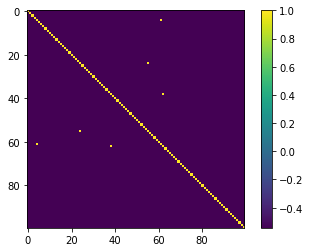

In [29]:
# Specify experiment settings
drop_out = 0.8

expName = 'cifar-mlp-dropout-%.1f-v1.1_w1-100' % drop_out
w1 = 100 # change conv1 dim
w2 = 100
SIMIL_THRESH = 0.9
LAYER_CURR = 'fc1'
LAYER_NEXT = 'fc2'


# =====================================================================
# Settings for MLP
# =====================================================================
batchSize = 100
useGpu = True
numEpochs = 50
learningRate = 0.03
gamma = 0.9  # learning rate decay
lr_decay_step = 1 # decay lr every "x" epochs
momentum = 0.9
weight_decay = 0.018


# experiment folder
expDir = os.path.join('./data', expName)

# =====================================================================
# setup and load CIFAR dataset for MLP
trainloader, testloader, classes = setup_cifar_data_mlp(batchSize)
# =====================================================================


# create experiment folder
if not os.path.exists(expDir):
    os.makedirs(expDir)
    
# save training config 
# (NOTE: changing values in the JSON will not reflect in training)
cfg = {'useGpu': useGpu, 'numEpochs': numEpochs, \
       'learningRate': learningRate, \
       'batchSize': batchSize, 'momentum': momentum, \
       'weight_decay': weight_decay, \
       'gamma': gamma, 'w1': w1, 'w2': w2}

# cfg = json.load(file(os.path.join(expDir,'train_config.json'), 'r'))
with open(os.path.join(expDir,'train_config.json'), 'w') as config_file :
    json.dump(cfg, config_file, indent=4, separators=(',', ': '), \
                                          sort_keys=True)

# =====================================================================
# create MLP with DropOut factor
# =====================================================================
net = MLPDropout(input_dim=3072, fc1_dim=w1, fc2_dim=w2, \
                 drop_out_factor=drop_out)
net._init_weights(init_sigma=0.003) # init using Gaussians
print(net)

# Define a Loss function and optimizer settings
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learningRate, \
                      momentum=momentum, weight_decay=weight_decay)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, lr_decay_step, gamma=gamma)


# =====================================================================
# Train and evaluate
# =====================================================================
if not os.path.isfile(os.path.join(expDir, 'net-trained.dat')):
    # Train the network
    train_cifar_net(net, trainloader, testloader, \
                    criterion, (optimizer,lr_scheduler), expDir, \
                    batchSize=batchSize,
                    numEpochs=numEpochs, useGpu=useGpu, \
                    doVisFilter=False, \
                    fixFilterList=[], verboseFrequency=100)
    torch.save(net.state_dict(), os.path.join(expDir,'net-trained.dat'))
else:
    print 'Loading network state dict from file.'
    net.load_state_dict(torch.load(os.path.join(expDir, 'net-trained.dat')))
    print 'Done.'
    
# Evaluate
if useGpu:
    net.cuda()

net.eval() # to handle dropout

train_acc = accuracy_on_dataset(net, trainloader, useGpu)
print('Accuracy of the network on the 50000 training images: %d %%' % (
    train_acc))

test_acc = accuracy_on_dataset(net, testloader, useGpu)
print('Accuracy of the network on the 10000 test images: %d %%' % (
    test_acc))

res = {'train_acc': train_acc, 'test_acc': test_acc}

# cfg = json.load(file(os.path.join(expDir,'train_config.json'), 'r'))
with open(os.path.join(expDir,'model_acc.json'), 'w') as res_file :
    json.dump(res, res_file, indent=4, separators=(',', ': '), \
                                          sort_keys=True)   

# Save visualizations    
net.cpu()
similMat, w = get_layer_cosine_similarity(net, 'fc1.weight')
np.save(os.path.join(expDir,'simil-mat'), similMat)
np.save(os.path.join(expDir,'w-mat'), w)
smat = np.load(os.path.join(expDir,'simil-mat.npy'))
w_mat = np.load(os.path.join(expDir,'w-mat.npy'))

f = plt.figure()
plt.imshow(similMat)
plt.colorbar()
f.savefig(os.path.join(expDir,'mlp-simil-mat.png'), 
                        bbox_inches='tight')    


# # Visualize first layer filters
# param_dict = net.state_dict()
# w_fc1 = param_dict['fc1.weight']
# w_fc1 = w_fc1.numpy()

# f = vis_linear_weights(w_fc1, num_cols=50) # MLP
# f.savefig(os.path.join(expDir,'mlp-filter.png'), 
#                         bbox_inches='tight')


# =====================================================================
# Group similar filters
# =====================================================================
# Get an adjancency matrix by thresholding the similarity matrix
net.cpu()
similMat, _ = get_layer_cosine_similarity(net, LAYER_CURR+'.weight') # returned as numpy arrays
sz = similMat.shape
adj_mat = np.greater(similMat, SIMIL_THRESH)

# show adjacency matrix
plt.imshow(adj_mat)  
# Find connected components in the graph induced by the adjacency matrix
cc_list, n_comps = get_adjmat_conn_comp(adj_mat)
print 'Number of connected comps in graph: %d ' % n_comps